In [92]:
import pickle
import numpy as np
import pydaisi as pyd
from PIL import Image
from IPython.display import display

In [93]:
face_recognition = pyd.Daisi("soul0101/Face Recognition")

[13:04:22] INFO     Calling https://app.daisi.io/pebble-api/daisies/connect?name=soul0101/Face       ]8;id=975160;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py\pydaisi.py]8;;\:]8;id=851584;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py#411\411]8;;\
                    Recognition                                                                                    

[13:04:23] INFO     Found existing Daisi: 9002b56c-4f85-44a3-95d2-0f4881720db6                       ]8;id=807854;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py\pydaisi.py]8;;\:]8;id=826943;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py#424\424]8;;\

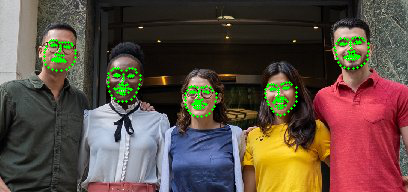

In [94]:
# Draw landmarks on detected faces
img = Image.open('./res/group.jpg')
landmark_img = face_recognition.draw_face_landmarks(img).value
display(landmark_img)

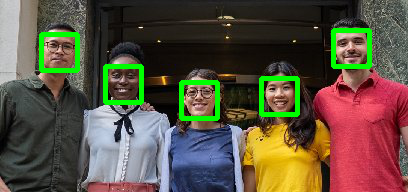

In [95]:
import sys
# Draw bounding boxes on detected faces
img = Image.open('./res/group.jpg')
bb_img = face_recognition.draw_face_bb(img).value
display(bb_img)

In [96]:
# Get face landmarks
img = Image.open('./res/group.jpg')
landmarks = face_recognition.get_face_landmarks(img).value
with open('./data/landmark_img_group.pickle', 'rb') as handle:
    gold_landmark = pickle.load(handle)
assert landmarks == gold_landmark

In [97]:
# Get face encodings
img = Image.open('./res/group.jpg')
encodings = face_recognition.get_face_encodings(img).value

with open('./data/encoding_img_group.pickle', 'rb') as handle:
    gold_encodings = pickle.load(handle)

assert np.array_equal(np.array(encodings), np.array(gold_encodings))


In [98]:
# Get face locations
img = Image.open('./res/group.jpg')
locations = face_recognition.get_face_locations(img).value

with open('./data/location_img_group.pickle', 'rb') as handle:
    gold_locations = pickle.load(handle)

assert np.array_equal(np.array(locations), np.array(gold_locations))

In [99]:
# Get face locations fast
img = Image.open('./res/group.jpg')
locations_fast = face_recognition.get_face_locations_fast(img).value

with open('./data/location(fast)_img_group.pickle', 'rb') as handle:
    gold_locations_fast = pickle.load(handle)

assert np.array_equal(np.array(locations_fast), np.array(gold_locations_fast))

In [100]:
# Check if any face from img2 matches the face in img1
img1 = Image.open('./res/sample_reference_face.jpg')
img2 = Image.open('./res/sample_check_face.jpg')
reference_encodings = face_recognition.get_face_encodings(img1).value
check_encodings = face_recognition.get_face_encodings(img2).value
result = face_recognition.compare_faces(check_encodings, reference_encodings[0]).value
if True in result:
    print("Authentication Succesful!")
else:
    print("Authentication Failed!")

assert True in result

Authentication Succesful!


In [101]:
# Check distance between face from img2 matches the face in img1
img1 = Image.open('./res/sample_reference_face.jpg')
img2 = Image.open('./res/sample_check_face.jpg')
reference_encodings = face_recognition.get_face_encodings(img1).value
check_encodings = face_recognition.get_face_encodings(img2).value

distance = face_recognition.similiarity_faces(reference_encodings, check_encodings[0]).value
with open('./data/distance.pickle', 'rb') as handle:
    gold_distance = pickle.load(handle)

assert np.array_equal(np.array(distance), np.array(gold_distance))